# Assignment 3 (dataset 2)
## Subtractive Normalization

In [89]:
import numpy as np
from matplotlib import pyplot as plt

1. Load the dataset

In [90]:
uu = np.loadtxt("../dataset2_lab_2_1.csv", delimiter=",", unpack=True)
print(uu)

[[  12.  3504. ]
 [  11.5 3693. ]
 [  11.  3436. ]
 [  12.  3433. ]
 [  10.5 3449. ]
 [  10.  4341. ]
 [   9.  4354. ]
 [   8.5 4312. ]
 [  10.  4425. ]
 [   8.5 3850. ]
 [  17.5 3090. ]
 [  11.5 4142. ]
 [  11.  4034. ]
 [  10.5 4166. ]
 [  11.  3850. ]
 [  10.  3563. ]
 [   8.  3609. ]
 [   8.  3353. ]
 [   9.5 3761. ]
 [  10.  3086. ]
 [  15.  2372. ]
 [  15.5 2833. ]
 [  15.5 2774. ]
 [  16.  2587. ]
 [  14.5 2130. ]
 [  20.5 1835. ]
 [  17.5 2672. ]
 [  14.5 2430. ]
 [  17.5 2375. ]
 [  12.5 2234. ]
 [  15.  2648. ]
 [  14.  4615. ]
 [  15.  4376. ]
 [  13.5 4382. ]
 [  18.5 4732. ]
 [  14.5 2130. ]
 [  15.5 2264. ]
 [  14.  2228. ]
 [  19.  2046. ]
 [  20.  1978. ]
 [  13.  2634. ]
 [  15.5 3439. ]
 [  15.5 3329. ]
 [  15.5 3302. ]
 [  15.5 3288. ]
 [  12.  4209. ]
 [  11.5 4464. ]
 [  13.5 4154. ]
 [  13.  4096. ]
 [  11.5 4955. ]
 [  12.  4746. ]
 [  12.  5140. ]
 [  13.5 2962. ]
 [  19.  2408. ]
 [  15.  3282. ]
 [  14.5 3139. ]
 [  14.  2220. ]
 [  14.  2123. ]
 [  19.5 2074.

In [91]:
u = uu
for i in range (len(uu)):
    u[i] = uu[i]/np.linalg.norm(uu[i])
print(u)


[[0.00342464 0.99999414]
 [0.00311398 0.99999515]
 [0.00320138 0.99999488]
 [0.00349546 0.99999389]
 [0.00304435 0.99999537]
 [0.00230361 0.99999735]
 [0.00206706 0.99999786]
 [0.00197124 0.99999806]
 [0.00225988 0.99999745]
 [0.00220779 0.99999756]
 [0.00566334 0.99998396]
 [0.00277643 0.99999615]
 [0.00272681 0.99999628]
 [0.0025204  0.99999682]
 [0.00285713 0.99999592]
 [0.00280661 0.99999606]
 [0.00221668 0.99999754]
 [0.00238592 0.99999715]
 [0.00252592 0.99999681]
 [0.00324042 0.99999475]
 [0.00632365 0.99998001]
 [0.00547115 0.99998503]
 [0.00558751 0.99998439]
 [0.00618465 0.99998087]
 [0.00680735 0.99997683]
 [0.01117097 0.9999376 ]
 [0.00654926 0.99997855]
 [0.00596697 0.9999822 ]
 [0.00736822 0.99997285]
 [0.00559526 0.99998435]
 [0.00566456 0.99998396]
 [0.00303357 0.9999954 ]
 [0.00342777 0.99999413]
 [0.00308077 0.99999525]
 [0.00390952 0.99999236]
 [0.00680735 0.99997683]
 [0.00684613 0.99997656]
 [0.00628354 0.99998026]
 [0.00928601 0.99995688]
 [0.01011071 0.99994889]


2. Implement a linear firing rate model

In [92]:
def linear_model(u,w):
    return np.dot(u,w)

Compute correlation matrix, and its principal eigenvector

In [93]:
Q = np.array([[0,0], [0,0]])
for i in range (len(u)):
     Q = Q + np.outer(u[i],u[i])
Q = Q/len(u)

print('Correlation matrix:\n',Q)

#Compute eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(Q)

#Principal eigenvector
max_eigvect = eig_vec[:,np.argmax(eig_val)]

min_eigvect = eig_vec[:,np.argmin(eig_val)]


print('\nMax eigvect:\n',max_eigvect)

Correlation matrix:
 [[3.75413213e-05 5.74194948e-03]
 [5.74194948e-03 9.99962459e-01]]

Max eigvect:
 [-0.0057421  -0.99998351]


# Assignment 3
## Subtractive Normalization Rule

In [94]:
# Implement Subtractive Normalization Rule
name = 'Subtractive Normalization'
#randomly initialized weight vector, from a uniform distribution [-1,1]
w = np.random.rand(2)*2 - 1 

#parameters
eta = 0.01
threshold = 1e-3
epochs = 100

#to keep track of evolution of w during training
w_hist = w
wold = w


Nu = len(u[0])
n = np.ones(Nu)

for N in range (epochs):

    if N % (epochs/10) == 0:
        print(f"Epoch {N} of {epochs}")

    #shuffle the input dataset
    uu = np.random.permutation(u)  

    for i in range (len(uu)):
        #Compute output
        v = linear_model(uu[i], w)
        #Subtractive Normalization Rule
        w = w + eta*v*uu[i] - eta*(v*np.dot(n,uu[i])*n)/Nu

        w_hist = np.vstack((w_hist, w))
    #stop learning if w stabilizes
    if np.linalg.norm(w-wold) < threshold:
        print(f"Stopped at epoch {N} because of w convergence")
        break
    #to prevent overflow:
    #if np.linalg.norm(w) > 1e20:
    #   print(f"Stopped at epoch {N} to prevent overflow")
    #   break
    wold = w

print('Training finished')

Epoch 0 of 100
Epoch 10 of 100
Epoch 20 of 100
Epoch 30 of 100
Epoch 40 of 100
Epoch 50 of 100
Epoch 60 of 100
Epoch 70 of 100
Epoch 80 of 100
Epoch 90 of 100
Training finished


Make plot (P2), plotting:
 - the evolution in time of the two components of the weight vector w
 - the evolution in time of the norm of the weight vector

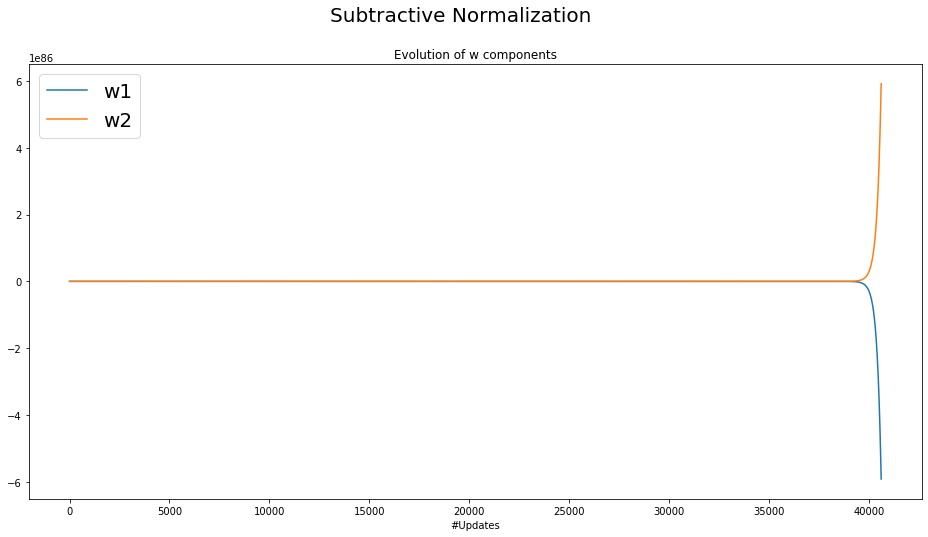

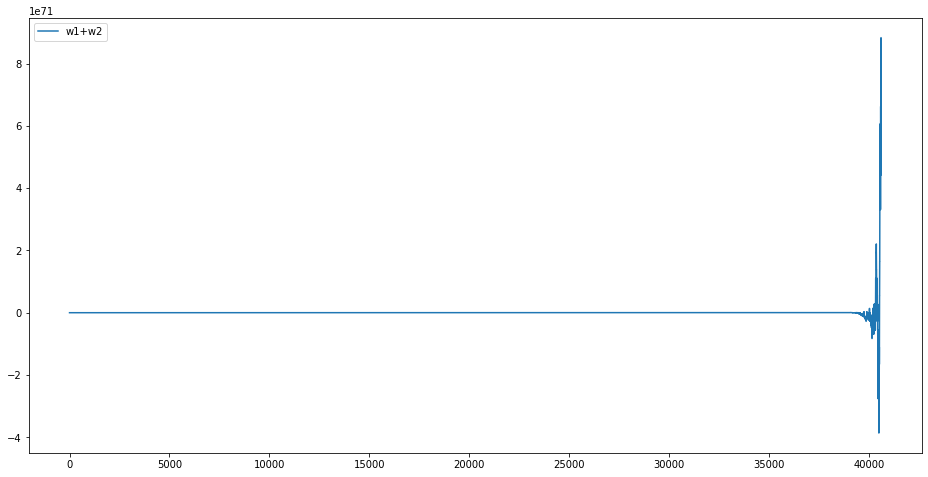

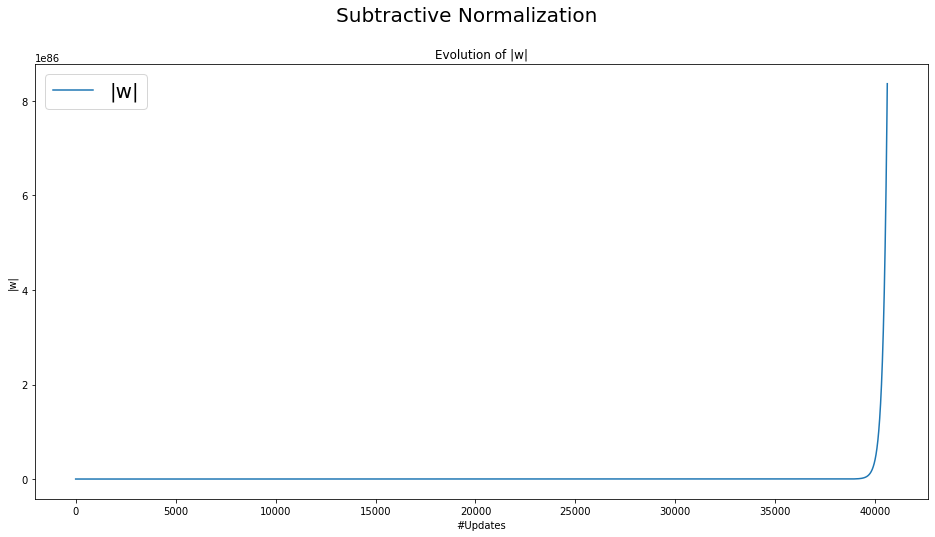

In [95]:
#plot P2
w1 = (np.transpose(w_hist))[0]
w2 = (np.transpose(w_hist))[1]
w_norm = np.sqrt(w1**2+w2**2)
t=np.arange(0,len(w1))

plt.figure(figsize=(16, 8))
plt.suptitle(name, fontsize=20)
plt.title('Evolution of w components')
plt.plot(t,w1, label='w1')
plt.plot(t,w2, label='w2')
plt.xlabel('#Updates')
plt.legend(fontsize="20")

plt.savefig('P2' + name + '_w_evolution',format='pdf')

plt.figure(figsize=(16, 8))
plt.plot(t,w1+w2, label='w1+w2')
plt.legend()

plt.figure(figsize=(16, 8))
plt.suptitle(name, fontsize=20)
plt.title('Evolution of |w|')
plt.ylabel('|w|')
plt.xlabel('#Updates')
plt.plot(t, w_norm, label='|w|')

plt.legend(fontsize="20")

plt.savefig('P2' + name + '_w_norm_evolution',format='pdf')


plt.show()

- We see that this rule is not stable, as we have an unbounded growth of |w|.
- We also see that, as espected by construction, the sum of the weights w1 + w2 is constant (apart from numerical instability)

Make plot (P1), displaying:
 - the training data points
 - the final weight vector w resulting from the learning process
 - the principal eigenvector of input correlation matrix Q

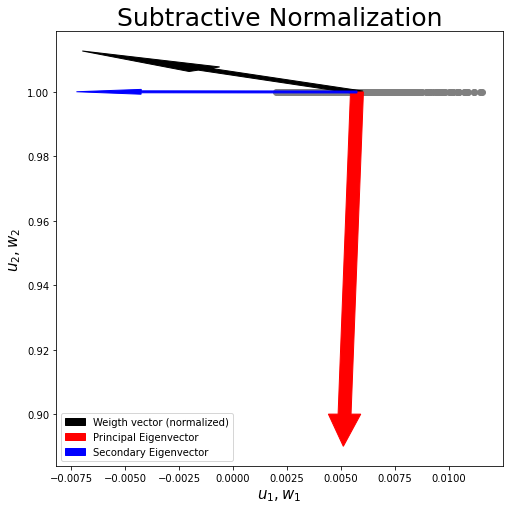

In [99]:
#P1
plt.figure(figsize=(8, 8))
plt.title(name, fontsize = 25)
#plot x,y axis
#plt.axhline(y=0, color='grey', linestyle = '--')
#plt.axvline(x=0, color='grey', linestyle = '--')

#plot inputs
u1 = (np.transpose(u))[0]
u2 = (np.transpose(u))[1]
plt.scatter(u1,u2, color= 'grey')

#normalized weigth vector
plt.arrow(np.mean(u[:,0]), np.mean(u[:,1]),0.01*w[0]/np.linalg.norm(w), 0.01*w[1]/np.linalg.norm(w) , width=0.0008, head_width=0.002, head_length=0.008, label='Weigth vector (normalized)', color = 'black')

#principal eigenvector
plt.arrow(np.mean(u[:,0]), np.mean(u[:,1]), 0.1*max_eigvect[0], 0.1*max_eigvect[1] , width=0.0006, head_width=0.0015, head_length=0.01, label='Principal Eigenvector', color = 'red')
#secondary eigenvector
plt.arrow(np.mean(u[:,0]), np.mean(u[:,1]), 0.01*min_eigvect[0], 0.01*min_eigvect[1] , width=0.0006, head_width=0.0015, head_length=0.003, label='Secondary Eigenvector', color = 'blue')

plt.xlabel('$u_1, w_1$', fontsize=15)
plt.ylabel('$u_2, w_2$', fontsize=15)
plt.legend()

plt.savefig('P1' + name,format='pdf')
plt.show()